In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df = pd.read_csv('../enigh_eda/joined_df.csv')

In [4]:
df.head()

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,...,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS,ingreso_por_persona,medicina_por_persona,ingreso_por_persona_mensual,medicina_por_persona_mensual,latitude,longitude,geometry
0,100005002,1001,1,4,3,3,56123.75,33749.99,0.00,0.00,...,419168,444725,246259,18707.916667,0.0,6235.972222,0.0,21.879823,-102.296047,POINT (-102.29604666666667 21.87982277777778)
1,100005003,1001,1,4,3,2,108048.87,61630.42,0.00,32282.60,...,419168,444725,246259,54024.435000,0.0,18008.145000,0.0,21.879823,-102.296047,POINT (-102.29604666666667 21.87982277777778)
2,100005004,1001,1,4,3,3,133852.88,41086.95,41478.26,11739.13,...,419168,444725,246259,44617.626667,0.0,14872.542222,0.0,21.879823,-102.296047,POINT (-102.29604666666667 21.87982277777778)
3,100012002,1001,1,3,2,1,24211.95,17364.13,0.00,0.00,...,419168,444725,246259,24211.950000,0.0,8070.650000,0.0,21.879823,-102.296047,POINT (-102.29604666666667 21.87982277777778)
4,100012002,1001,1,3,2,4,105054.15,0.00,0.00,0.00,...,419168,444725,246259,26263.537500,0.0,8754.512500,0.0,21.879823,-102.296047,POINT (-102.29604666666667 21.87982277777778)


In [5]:
df.columns

Index(['folioviv', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis', 'tot_integ',
       'ing_cor', 'sueldos', 'negocio', 'rentas', 'bene_gob', 'gasto_mon',
       'alimentos', 'ali_dentro', 'medicinas', 'percep_tot', 'entidad',
       'municipio', 'CVEGEO', 'Estatus', 'CVE_ENT', 'NOM_ENT', 'NOM_ABR',
       'CVE_MUN', 'NOM_MUN', 'CVE_LOC', 'NOM_LOC', 'AMBITO', 'LATITUD',
       'LONGITUD', 'LAT_DECIMAL', 'LON_DECIMAL', 'ALTITUD', 'CVE_CARTA',
       'POB_TOTAL', 'POB_MASCULINA', 'POB_FEMENINA',
       'TOTAL DE VIVIENDAS HABITADAS', 'ingreso_por_persona',
       'medicina_por_persona', 'ingreso_por_persona_mensual',
       'medicina_por_persona_mensual', 'latitude', 'longitude', 'geometry'],
      dtype='object')

In [6]:
df_medicinas = df[df['medicina_por_persona']>0].reset_index(drop=True)

In [7]:
df_medicinas.columns

Index(['folioviv', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis', 'tot_integ',
       'ing_cor', 'sueldos', 'negocio', 'rentas', 'bene_gob', 'gasto_mon',
       'alimentos', 'ali_dentro', 'medicinas', 'percep_tot', 'entidad',
       'municipio', 'CVEGEO', 'Estatus', 'CVE_ENT', 'NOM_ENT', 'NOM_ABR',
       'CVE_MUN', 'NOM_MUN', 'CVE_LOC', 'NOM_LOC', 'AMBITO', 'LATITUD',
       'LONGITUD', 'LAT_DECIMAL', 'LON_DECIMAL', 'ALTITUD', 'CVE_CARTA',
       'POB_TOTAL', 'POB_MASCULINA', 'POB_FEMENINA',
       'TOTAL DE VIVIENDAS HABITADAS', 'ingreso_por_persona',
       'medicina_por_persona', 'ingreso_por_persona_mensual',
       'medicina_por_persona_mensual', 'latitude', 'longitude', 'geometry'],
      dtype='object')

In [8]:
df_medicinas['medicina_por_persona']

0         244.565000
1         326.086667
2         293.460000
3          24.455000
4          65.216667
            ...     
34763     352.170000
34764     134.990000
34765      21.520000
34766    1304.346667
34767     363.583333
Name: medicina_por_persona, Length: 34768, dtype: float64

In [9]:
df_medicinas[['ingreso_por_persona_mensual','medicina_por_persona_mensual']].corr()

,ingreso_por_persona_mensual,medicina_por_persona_mensual
ingreso_por_persona_mensual,1.000000,0.212419
medicina_por_persona_mensual,0.212419,1.000000


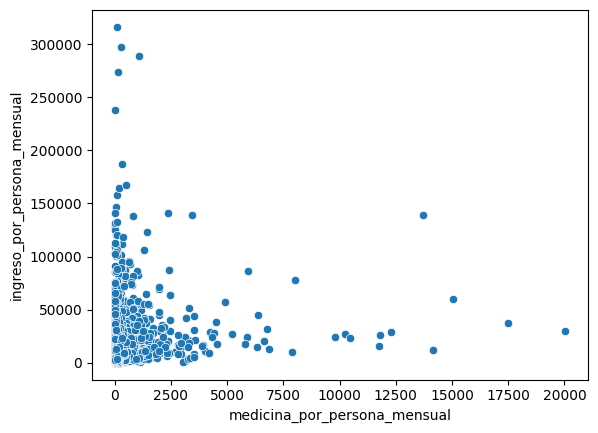

In [10]:
sns.scatterplot(x='medicina_por_persona_mensual',y='ingreso_por_persona_mensual',data=df_medicinas)
plt.show()

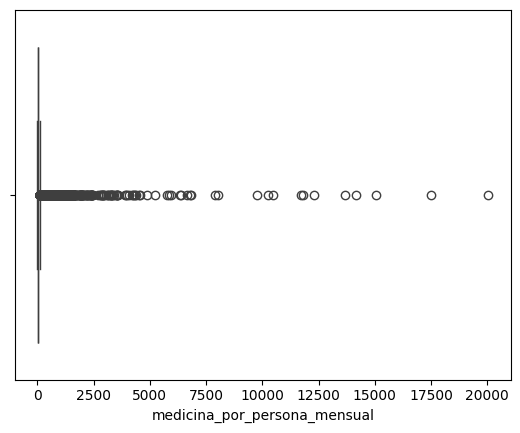

In [11]:
sns.boxplot(x='medicina_por_persona_mensual',data=df_medicinas)
plt.show()

In [12]:
df_medicinas['medicina_por_persona_mensual'].describe()

count    34768.000000
mean        71.878398
std        329.650061
min          0.162778
25%          6.928333
50%         16.303889
75%         48.523125
max      20046.520000
Name: medicina_por_persona_mensual, dtype: float64

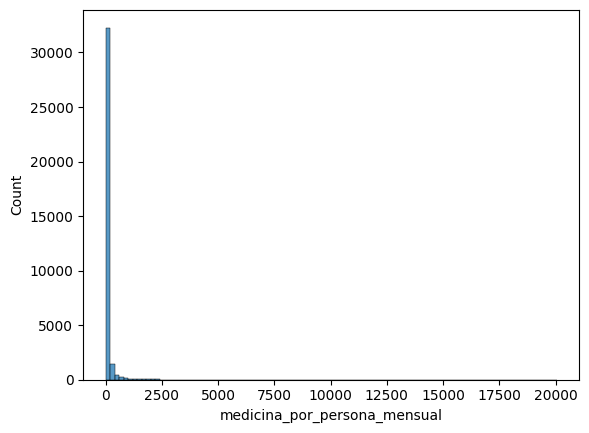

In [13]:
sns.histplot(df_medicinas['medicina_por_persona_mensual'],bins=100)
plt.show()

In [14]:
df_medicinas['log_medicina_por_persona_mensual'] = np.log(df_medicinas['medicina_por_persona_mensual'])

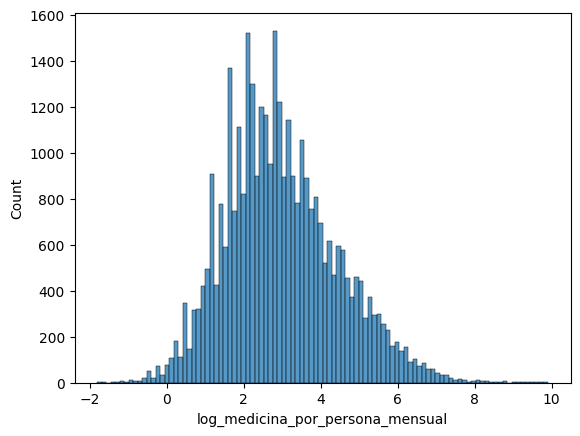

In [15]:
sns.histplot(df_medicinas['log_medicina_por_persona_mensual'],bins=100)
plt.show()

In [16]:
df_atypical = df_medicinas[df_medicinas['medicina_por_persona_mensual']>71+329].reset_index(drop=True)

<Axes: xlabel='medicina_por_persona_mensual', ylabel='Count'>

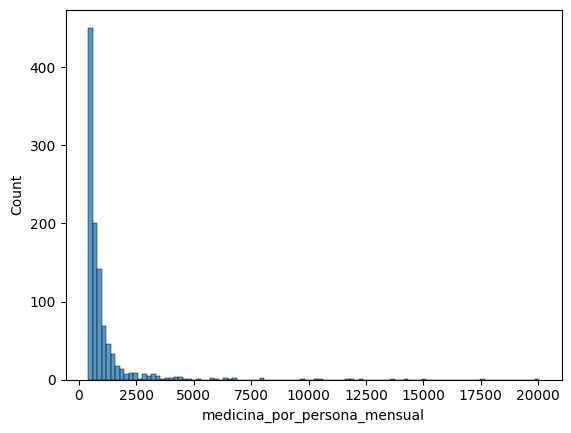

In [17]:
sns.histplot(df_atypical['medicina_por_persona_mensual'],bins=100)

<Axes: xlabel='medicina_por_persona_mensual'>

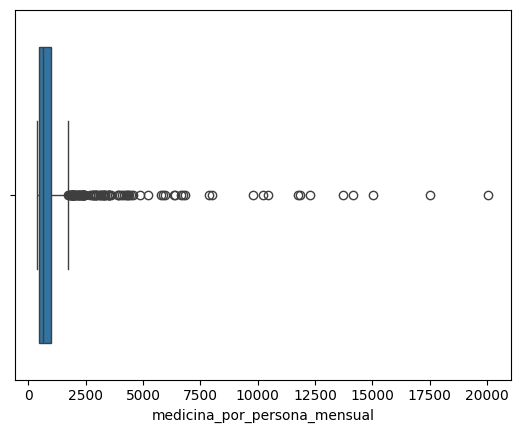

In [18]:
sns.boxplot(x='medicina_por_persona_mensual',data=df_atypical)

In [19]:
df_medicinas['ingreso_por_persona_mensual'].describe()

count     34768.000000
mean       7142.984199
std        8766.559089
min           0.000000
25%        3064.698750
50%        4914.492000
75%        8221.132500
max      316393.440000
Name: ingreso_por_persona_mensual, dtype: float64

In [20]:
df_atypical = df_medicinas[(df_medicinas['ingreso_por_persona_mensual']<3000) & (df_medicinas['ingreso_por_persona_mensual']>0)].reset_index(drop=True)

In [21]:
df_atypical[['ingreso_por_persona_mensual','medicina_por_persona_mensual']].corr()

,ingreso_por_persona_mensual,medicina_por_persona_mensual
ingreso_por_persona_mensual,1.00000,0.04946
medicina_por_persona_mensual,0.04946,1.00000


In [22]:
df_medicinas[['ubica_geo','NOM_ENT','NOM_MUN']]

,ubica_geo,NOM_ENT,NOM_MUN
0,1001,Aguascalientes,Aguascalientes
1,1001,Aguascalientes,Aguascalientes
2,1001,Aguascalientes,Aguascalientes
3,1001,Aguascalientes,Aguascalientes
4,1001,Aguascalientes,Aguascalientes
...,...,...,...
34763,32046,Zacatecas,Tepetongo
34764,32046,Zacatecas,Tepetongo
34765,32046,Zacatecas,Tepetongo
34766,32046,Zacatecas,Tepetongo


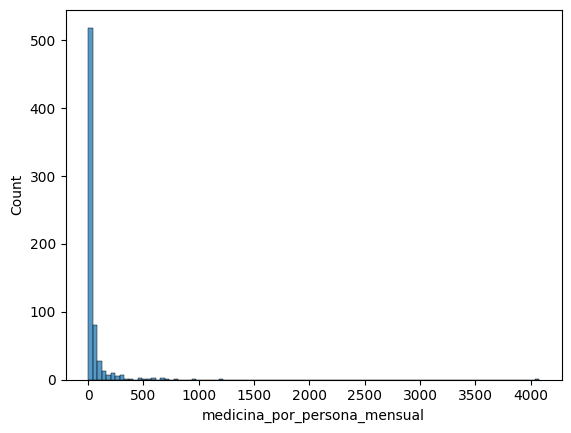

In [23]:
sns.histplot(df_medicinas[df_medicinas['ubica_geo']==8037], x='medicina_por_persona_mensual',bins=100)
plt.show()

In [24]:
df_medicinas['ubica_geo'].nunique()

1115

In [25]:
df_pobreza = pd.read_csv('pobreza.csv', skiprows=2)

In [26]:
df_pobreza = df_pobreza.drop([0,1], axis=0)

In [27]:
df_medicinas['ubica_geo'] = df_medicinas['ubica_geo'].astype(str)

In [28]:
df_medicinas['ubica_geo']

0         1001
1         1001
2         1001
3         1001
4         1001
         ...  
34763    32046
34764    32046
34765    32046
34766    32046
34767    32046
Name: ubica_geo, Length: 34768, dtype: object

In [29]:
df_pobreza['Clave de municipio'] = df_pobreza['Clave de municipio'].astype(str)

In [30]:
df_pobreza['Clave de municipio'] = df_pobreza['Clave de municipio'].str.replace('.0','')

In [31]:
df_pobreza.columns

Index(['Clave de entidad', 'Entidad federativa', 'Clave de municipio',
       'Municipio', 'Población 2010*\n(leer nota al final del cuadro)',
       'Población 2015*\n(leer nota al final del cuadro)',
       'Población 2020*\n(leer nota al final del cuadro)', 'Porcentaje\n2010',
       'Porcentaje\n2015', 'Porcentaje\n2020',
       ...
       'Carencias promedio\n2020.12', 'Porcentaje\n2010.15',
       'Porcentaje\n2015.15', 'Porcentaje\n2020.15', 'Personas\n2010.15',
       'Personas\n2015.15', 'Personas\n2020.15', 'Carencias promedio\n2010.13',
       'Carencias promedio\n2015.13', 'Carencias promedio\n2020.13'],
      dtype='object', length=145)

In [32]:
pobreza_check = pd.merge(df_medicinas[['ubica_geo','medicina_por_persona_mensual','alimentos','ingreso_por_persona_mensual']], df_pobreza, left_on='ubica_geo', right_on='Clave de municipio', how='left')

In [33]:
df_pobreza.columns

Index(['Clave de entidad', 'Entidad federativa', 'Clave de municipio',
       'Municipio', 'Población 2010*\n(leer nota al final del cuadro)',
       'Población 2015*\n(leer nota al final del cuadro)',
       'Población 2020*\n(leer nota al final del cuadro)', 'Porcentaje\n2010',
       'Porcentaje\n2015', 'Porcentaje\n2020',
       ...
       'Carencias promedio\n2020.12', 'Porcentaje\n2010.15',
       'Porcentaje\n2015.15', 'Porcentaje\n2020.15', 'Personas\n2010.15',
       'Personas\n2015.15', 'Personas\n2020.15', 'Carencias promedio\n2010.13',
       'Carencias promedio\n2015.13', 'Carencias promedio\n2020.13'],
      dtype='object', length=145)

In [34]:
pobreza_check

,ubica_geo,medicina_por_persona_mensual,alimentos,ingreso_por_persona_mensual,Clave de entidad,Entidad federativa,Clave de municipio,Municipio,Población 2010*\n(leer nota al final del cuadro),Población 2015*\n(leer nota al final del cuadro),...,Carencias promedio\n2020.12,Porcentaje\n2010.15,Porcentaje\n2015.15,Porcentaje\n2020.15,Personas\n2010.15,Personas\n2015.15,Personas\n2020.15,Carencias promedio\n2010.13,Carencias promedio\n2015.13,Carencias promedio\n2020.13
0,1001,81.521667,17357.02,5021.737500,1.0,Aguascalientes,1001,Aguascalientes,801.807,861.446,...,"1,3","9,9","10,0","9,0",79.703,86.166,82.866,"1,8","1,5","1,7"
1,1001,108.695556,17318.42,17599.936667,1.0,Aguascalientes,1001,Aguascalientes,801.807,861.446,...,"1,3","9,9","10,0","9,0",79.703,86.166,82.866,"1,8","1,5","1,7"
2,1001,97.820000,14129.93,28566.263333,1.0,Aguascalientes,1001,Aguascalientes,801.807,861.446,...,"1,3","9,9","10,0","9,0",79.703,86.166,82.866,"1,8","1,5","1,7"
3,1001,8.151667,29044.12,11535.586667,1.0,Aguascalientes,1001,Aguascalientes,801.807,861.446,...,"1,3","9,9","10,0","9,0",79.703,86.166,82.866,"1,8","1,5","1,7"
4,1001,21.738889,32399.73,12366.758889,1.0,Aguascalientes,1001,Aguascalientes,801.807,861.446,...,"1,3","9,9","10,0","9,0",79.703,86.166,82.866,"1,8","1,5","1,7"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34763,32046,117.390000,6904.24,3936.383333,32.0,Zacatecas,32046,Tepetongo,6.579,7.076,...,"1,6","18,4","31,2","17,4",1.212,2.206,1.141,"2,6","2,1","1,7"
34764,32046,44.996667,7045.63,12767.260000,32.0,Zacatecas,32046,Tepetongo,6.579,7.076,...,"1,6","18,4","31,2","17,4",1.212,2.206,1.141,"2,6","2,1","1,7"
34765,32046,7.173333,23091.19,3030.457333,32.0,Zacatecas,32046,Tepetongo,6.579,7.076,...,"1,6","18,4","31,2","17,4",1.212,2.206,1.141,"2,6","2,1","1,7"
34766,32046,434.782222,22936.88,9658.077778,32.0,Zacatecas,32046,Tepetongo,6.579,7.076,...,"1,6","18,4","31,2","17,4",1.212,2.206,1.141,"2,6","2,1","1,7"


In [35]:
pobreza_check['Población 2020*\n(leer nota al final del cuadro)'] = pobreza_check['Población 2020*\n(leer nota al final del cuadro)'].str.replace(".","").astype(int)

In [36]:
pobreza_check['Población 2020*\n(leer nota al final del cuadro)'] = pobreza_check['Población 2020*\n(leer nota al final del cuadro)'].astype(float)

In [37]:
pobreza_check['Porcentaje\n2020'] = pobreza_check['Porcentaje\n2020'].str.replace(",","").astype(float)

In [38]:
from scipy import stats

In [39]:
pobreza_check[['medicina_por_persona_mensual','alimentos','ingreso_por_persona_mensual','Población 2020*\n(leer nota al final del cuadro)','Porcentaje\n2020']].corr()

,medicina_por_persona_mensual,alimentos,ingreso_por_persona_mensual,Población 2020*\n(leer nota al final del cuadro),Porcentaje\n2020
medicina_por_persona_mensual,1.000000,0.055571,0.212419,0.030236,-0.063063
alimentos,0.055571,1.000000,0.270157,0.116616,-0.175687
ingreso_por_persona_mensual,0.212419,0.270157,1.000000,0.153216,-0.246981
Población 2020*\n(leer nota al final del cuadro),0.030236,0.116616,0.153216,1.000000,-0.465791
Porcentaje\n2020,-0.063063,-0.175687,-0.246981,-0.465791,1.000000


In [40]:
x = pobreza_check['Porcentaje\n2020']
y = pobreza_check['medicina_por_persona_mensual']

corr, p_value = stats.pearsonr(x,y)

print(f'Pearson correlation coefficient: {corr}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.06306336658109349
P-value: 5.559143084998856e-32


In [41]:
x = df_medicinas['ingreso_por_persona_mensual']
y = df_medicinas['medicina_por_persona_mensual']

corr, p_value = stats.pearsonr(x,y)

print(f'Pearson correlation coefficient: {corr}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.21241877619213198
P-value: 0.0


In [42]:
df_medicinas['alimentos_por_persona_mensual'] = df_medicinas['alimentos']/df_medicinas['tot_integ']/3

In [43]:
relevant_df = df_medicinas[['ubica_geo','medicina_por_persona_mensual','alimentos_por_persona_mensual','ingreso_por_persona_mensual']]

In [44]:
grouped_mun = relevant_df.groupby('ubica_geo')

In [45]:
for a,b in grouped_mun:
    print(a)
    print(b['medicina_por_persona_mensual'].mean())

10001
32.09065185185185
10004
42.941619203236854
10005
121.36675944534976
10006
43.997012767425815
10007
51.27667529601999
1001
127.37175816185271
10010
107.53625661375662
10012
40.697730583900224
10013
105.56820598845601
10014
27.31613086419753
10015
45.587172123015876
10016
258.5397142857143
10018
25.100944444444444
1002
105.75602166452167
10020
31.273135802469135
10022
54.79580808080807
10023
10.802472222222221
10024
40.41736044973545
10026
62.125193700396835
10027
63.473701234567905
1003
70.09136195575955
10031
28.588595238095245
10032
49.027261460761466
10034
47.061563492063485
10035
119.08941137566138
10036
59.0900992063492
10037
2142.6602777777775
10038
185.67746111111109
1004
52.1852380952381
1005
93.09274691798943
1006
60.575535558667916
1007
64.39531898148148
1009
59.01724652777777
1010
56.628832464096746
1011
91.2391183531746
11001
21.032159313725487
11002
9.44205782312925
11003
25.530895238095237
11004
25.7090873015873
11005
32.87302619047619
11007
58.95825044563279
11008
4

In [47]:
from scipy.stats import gaussian_kde

In [123]:
medicinas_pdf_df = pd.DataFrame(columns=['ubica_geo','shape','loc','scale'])

In [124]:
df_medicinas['medicina_por_persona_mensual'].isna().sum()

np.int64(0)

In [125]:
relevant_df.columns

Index(['ubica_geo', 'medicina_por_persona_mensual',
       'alimentos_por_persona_mensual', 'ingreso_por_persona_mensual'],
      dtype='object')

In [126]:
from tqdm import tqdm

for ubica_geo, data in tqdm(grouped_mun, desc='Fitting log-normal', unit='municipios'):
    if len(data['medicina_por_persona_mensual']) < 2:
        # Create 30 random multipliers between 0.9 and 1.1
        random_multipliers = np.random.uniform(0.9, 1.1, size=30)

        # Repeat the original data to make sure it has 30 rows
        original_data_repeated = pd.concat([data] * (30 // len(data) + 1), ignore_index=True)
        
        # Trim the repeated data to exactly 30 rows
        original_data_repeated = original_data_repeated.iloc[:30]

        # Multiply the 'medicina_por_persona_mensual' by the random multipliers
        original_data_repeated['medicina_por_persona_mensual'] *= random_multipliers
        
        data = original_data_repeated 

    shape, loc, scale = stats.lognorm.fit(data['medicina_por_persona_mensual'])

    params = {'ubica_geo':ubica_geo,'shape':shape,'loc':loc,'scale':scale}

    medicinas_pdf_df = pd.concat([medicinas_pdf_df,pd.DataFrame([params])], ignore_index=True)

medicinas_pdf_df.to_csv('medicinas_pdf.csv', index=False)

Fitting log-normal:   0%|          | 0/1115 [00:00<?, ?municipios/s]/tmp/ipykernel_280987/3354999230.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  medicinas_pdf_df = pd.concat([medicinas_pdf_df,pd.DataFrame([params])], ignore_index=True)
Fitting log-normal: 100%|██████████| 1115/1115 [00:02<00:00, 474.45municipios/s]


In [128]:
medicinas_pdf_df.head()

,ubica_geo,shape,loc,scale
0,10001,1.346705,1.168024,12.707507
1,10004,9.259908,1.630000,1.882366
2,10005,1.793580,1.213204,23.774215
3,10006,1.677445,2.947515,11.435605
4,10007,1.517629,0.868273,13.370695


In [129]:
shape = row['shape'].values[0]  # 'shape' is also referred to as sigma
loc = row['loc'].values[0]      # 'loc' parameter
scale = row['scale'].values[0] 

NameError: name 'row' is not defined

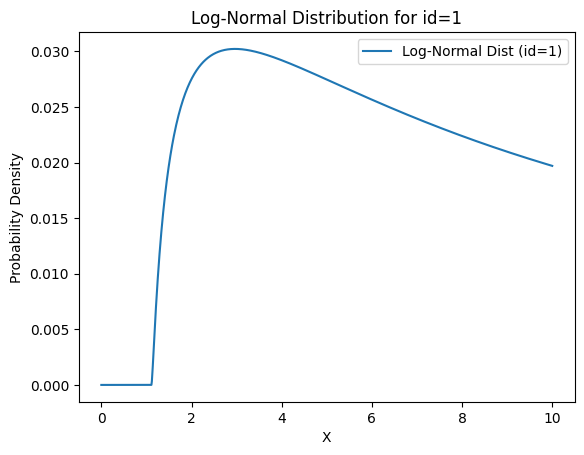

In [130]:
# Generate values from a log-normal distribution
x = np.linspace(0, 10, 1000)  # Create a range of x-values
y = stats.lognorm.pdf(x, s=shape, loc=loc, scale=scale)  # Probability density function for log-normal

# Plot the distribution
plt.plot(x, y, label=f'Log-Normal Dist (id=1)')
plt.title('Log-Normal Distribution for id=1')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [131]:
df_medicinas.columns

Index(['folioviv', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis', 'tot_integ',
       'ing_cor', 'sueldos', 'negocio', 'rentas', 'bene_gob', 'gasto_mon',
       'alimentos', 'ali_dentro', 'medicinas', 'percep_tot', 'entidad',
       'municipio', 'CVEGEO', 'Estatus', 'CVE_ENT', 'NOM_ENT', 'NOM_ABR',
       'CVE_MUN', 'NOM_MUN', 'CVE_LOC', 'NOM_LOC', 'AMBITO', 'LATITUD',
       'LONGITUD', 'LAT_DECIMAL', 'LON_DECIMAL', 'ALTITUD', 'CVE_CARTA',
       'POB_TOTAL', 'POB_MASCULINA', 'POB_FEMENINA',
       'TOTAL DE VIVIENDAS HABITADAS', 'ingreso_por_persona',
       'medicina_por_persona', 'ingreso_por_persona_mensual',
       'medicina_por_persona_mensual', 'latitude', 'longitude', 'geometry',
       'log_medicina_por_persona_mensual', 'alimentos_por_persona_mensual'],
      dtype='object')

In [132]:
df_medicinas[['latitude','longitude','LAT_DECIMAL','LON_DECIMAL']]

,latitude,longitude,LAT_DECIMAL,LON_DECIMAL
0,21.879823,-102.296047,21.879822,-102.296046
1,21.879823,-102.296047,21.879822,-102.296046
2,21.879823,-102.296047,21.879822,-102.296046
3,21.879823,-102.296047,21.879822,-102.296046
4,21.879823,-102.296047,21.879822,-102.296046
...,...,...,...,...
34763,22.461265,-103.147898,22.461265,-103.147898
34764,22.461265,-103.147898,22.461265,-103.147898
34765,22.461265,-103.147898,22.461265,-103.147898
34766,22.461265,-103.147898,22.461265,-103.147898


In [133]:
df_mun = df_medicinas[['ubica_geo','CVE_ENT', 'AMBITO','LAT_DECIMAL', 'LON_DECIMAL',
       'POB_TOTAL', 'POB_MASCULINA', 'POB_FEMENINA',
       'TOTAL DE VIVIENDAS HABITADAS']]

In [134]:
df_mun.dtypes

ubica_geo                        object
CVE_ENT                           int64
AMBITO                           object
LAT_DECIMAL                     float64
LON_DECIMAL                     float64
POB_TOTAL                         int64
POB_MASCULINA                     int64
POB_FEMENINA                      int64
TOTAL DE VIVIENDAS HABITADAS      int64
dtype: object

In [135]:
df_todos_municipios = pd.read_csv('../enigh_eda/AGEEML_20249151733738.csv', encoding='latin1')

In [136]:
df_todos_municipios = df_todos_municipios[df_todos_municipios['CVE_LOC'] == 1].reset_index(drop=True)

In [137]:
df_todos_municipios['CVE_MUN'] = df_todos_municipios['CVE_MUN'].astype(str).str.zfill(3)
df_todos_municipios['CVE_ENT'] = df_todos_municipios['CVE_ENT'].astype(str).str.zfill(2)

In [138]:
df_todos_municipios['ubica_geo'] = df_todos_municipios['CVE_ENT'] + df_todos_municipios['CVE_MUN']

In [139]:
df_mun_relevant = df_todos_municipios[['ubica_geo','CVE_ENT', 'AMBITO','LAT_DECIMAL', 'LON_DECIMAL',
       'POB_TOTAL', 'POB_MASCULINA', 'POB_FEMENINA',
       'TOTAL DE VIVIENDAS HABITADAS']]

In [140]:
df_mun_relevant = df_mun_relevant.drop_duplicates(subset='ubica_geo')

In [141]:
df_mun_relevant.head()

,ubica_geo,CVE_ENT,AMBITO,LAT_DECIMAL,LON_DECIMAL,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,01001,01,U,21.879822,-102.296046,863893,419168,444725,246259
1,01002,01,U,22.238317,-102.089275,5248,2544,2704,1263
2,01003,01,U,21.846907,-102.718750,21049,10175,10874,5626
3,01004,01,U,22.366409,-102.300044,5870,2792,3078,1430
4,01005,01,U,21.961273,-102.343416,63805,31399,32406,16023


In [142]:
df_mun = df_mun.drop_duplicates(subset='ubica_geo')

In [143]:
df_mun

,ubica_geo,CVE_ENT,AMBITO,LAT_DECIMAL,LON_DECIMAL,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,1001,1,U,21.879822,-102.296046,863893,419168,444725,246259
382,1003,1,U,21.846907,-102.718750,21049,10175,10874,5626
391,1005,1,U,21.961273,-102.343416,63805,31399,32406,16023
426,1006,1,U,22.149201,-102.276541,32035,15668,16367,7794
448,1007,1,U,22.229232,-102.323068,31963,15530,16433,7803
...,...,...,...,...,...,...,...,...,...
34708,32054,32,U,22.357088,-101.712599,4851,2332,2519,1242
34729,32002,32,U,21.388438,-102.681208,1619,780,839,459
34741,32012,32,U,22.487614,-102.456574,1428,670,758,381
34748,32033,32,U,21.265594,-103.165697,2294,1072,1222,731


In [144]:
df_mun_relevant['ubica_geo'] = df_mun_relevant['ubica_geo'].str.lstrip('0')

In [145]:
filtered_df_mun_estimate = df_mun_relevant[~df_mun_relevant['ubica_geo'].isin(df_mun['ubica_geo'])]

In [146]:
df_encoded_infer = pd.get_dummies(filtered_df_mun_estimate,columns=['AMBITO','CVE_ENT'])

In [147]:
df_encoded_infer = df_encoded_infer.reset_index(drop=True)

In [148]:
df_encoded_infer.dtypes

ubica_geo                        object
LAT_DECIMAL                     float64
LON_DECIMAL                     float64
POB_TOTAL                        object
POB_MASCULINA                    object
POB_FEMENINA                     object
TOTAL DE VIVIENDAS HABITADAS     object
AMBITO_R                           bool
AMBITO_U                           bool
CVE_ENT_01                         bool
CVE_ENT_02                         bool
CVE_ENT_04                         bool
CVE_ENT_05                         bool
CVE_ENT_07                         bool
CVE_ENT_08                         bool
CVE_ENT_10                         bool
CVE_ENT_11                         bool
CVE_ENT_12                         bool
CVE_ENT_13                         bool
CVE_ENT_14                         bool
CVE_ENT_15                         bool
CVE_ENT_16                         bool
CVE_ENT_17                         bool
CVE_ENT_18                         bool
CVE_ENT_19                         bool


In [149]:
df_encoded_infer = df_encoded_infer.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

/tmp/ipykernel_280987/967829139.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded_infer = df_encoded_infer.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


In [150]:
df_encoded_infer = df_encoded_infer.astype('float')

In [151]:
from sklearn.metrics.pairwise import cosine_similarity


In [152]:
def find_most_similar_ids(df_a, df_b):
    # Extract the IDs from both DataFrames
    ids_a = df_a['ubica_geo']
    ids_b = df_b['ubica_geo']
    
    # Drop the ID columns to compute cosine similarity on the features
    features_a = df_a.drop(columns=['ubica_geo']).fillna(0)
    features_b = df_b.drop(columns=['ubica_geo']).fillna(0)
    
    # Compute cosine similarity between every row in A and every row in B
    similarity_matrix = cosine_similarity(features_a, features_b)
    
    # Find the index of the most similar row in B for each row in A
    most_similar_indices = similarity_matrix.argmax(axis=1)
    
    # Map these indices to the corresponding IDs in DataFrame B
    most_similar_ids = ids_b.iloc[most_similar_indices].values
    
    # Create a result DataFrame showing each row in A and its most similar row's ID in B
    result_df = pd.DataFrame({
        'id_A': ids_a,
        'most_similar_id_B': most_similar_ids
    })
    
    return result_df

In [153]:
df_mun_query = pd.get_dummies(df_mun,columns=['AMBITO','CVE_ENT']).astype('float')

In [154]:
df_mun_query.shape

(1115, 41)

In [155]:
df_mun_query.columns

Index(['ubica_geo', 'LAT_DECIMAL', 'LON_DECIMAL', 'POB_TOTAL', 'POB_MASCULINA',
       'POB_FEMENINA', 'TOTAL DE VIVIENDAS HABITADAS', 'AMBITO_R', 'AMBITO_U',
       'CVE_ENT_1', 'CVE_ENT_2', 'CVE_ENT_3', 'CVE_ENT_4', 'CVE_ENT_5',
       'CVE_ENT_6', 'CVE_ENT_7', 'CVE_ENT_8', 'CVE_ENT_9', 'CVE_ENT_10',
       'CVE_ENT_11', 'CVE_ENT_12', 'CVE_ENT_13', 'CVE_ENT_14', 'CVE_ENT_15',
       'CVE_ENT_16', 'CVE_ENT_17', 'CVE_ENT_18', 'CVE_ENT_19', 'CVE_ENT_20',
       'CVE_ENT_21', 'CVE_ENT_22', 'CVE_ENT_23', 'CVE_ENT_24', 'CVE_ENT_25',
       'CVE_ENT_26', 'CVE_ENT_27', 'CVE_ENT_28', 'CVE_ENT_29', 'CVE_ENT_30',
       'CVE_ENT_31', 'CVE_ENT_32'],
      dtype='object')

In [156]:
df_encoded_infer.shape

(1361, 38)

In [157]:
df_encoded_infer.columns

Index(['ubica_geo', 'LAT_DECIMAL', 'LON_DECIMAL', 'POB_TOTAL', 'POB_MASCULINA',
       'POB_FEMENINA', 'TOTAL DE VIVIENDAS HABITADAS', 'AMBITO_R', 'AMBITO_U',
       'CVE_ENT_01', 'CVE_ENT_02', 'CVE_ENT_04', 'CVE_ENT_05', 'CVE_ENT_07',
       'CVE_ENT_08', 'CVE_ENT_10', 'CVE_ENT_11', 'CVE_ENT_12', 'CVE_ENT_13',
       'CVE_ENT_14', 'CVE_ENT_15', 'CVE_ENT_16', 'CVE_ENT_17', 'CVE_ENT_18',
       'CVE_ENT_19', 'CVE_ENT_20', 'CVE_ENT_21', 'CVE_ENT_22', 'CVE_ENT_23',
       'CVE_ENT_24', 'CVE_ENT_25', 'CVE_ENT_26', 'CVE_ENT_27', 'CVE_ENT_28',
       'CVE_ENT_29', 'CVE_ENT_30', 'CVE_ENT_31', 'CVE_ENT_32'],
      dtype='object')

In [158]:
df_encoded_infer['CVE_ENT_03'] = 0
df_encoded_infer['CVE_ENT_06'] = 0
df_encoded_infer['CVE_ENT_09'] = 0

In [159]:
df_encoded_infer.shape

(1361, 41)

In [160]:
df_mun_query['ubica_geo'].isin(df_medicinas['ubica_geo'].astype(float)).sum()

np.int64(1115)

In [161]:
resulting_df = find_most_similar_ids(df_encoded_infer, df_mun_query)

In [162]:
resulting_df

,id_A,most_similar_id_B
0,1008.0,22018.0
1,2006.0,8059.0
2,2007.0,23003.0
3,4008.0,31084.0
4,4012.0,18020.0
...,...,...
1356,32037.0,10006.0
1357,32041.0,31017.0
1358,32043.0,14081.0
1359,32047.0,13022.0


In [163]:
resulting_df['id_A'] = resulting_df['id_A'].astype(str).str.replace('.0','')
resulting_df['most_similar_id_B'] = resulting_df['most_similar_id_B'].astype(str).str.replace('.0','')

In [164]:
resulting_df

,id_A,most_similar_id_B
0,1008,22018
1,2006,8059
2,2007,23003
3,4008,31084
4,4012,18020
...,...,...
1356,32037,10006
1357,32041,31017
1358,32043,14081
1359,32047,13022


In [165]:
resulting_df['most_similar_id_B'].isin(df_mun['ubica_geo'].astype(str)).sum()

np.int64(1361)

In [166]:
new_mun = pd.merge(resulting_df,medicinas_pdf_df, left_on='most_similar_id_B', right_on='ubica_geo').drop(columns = ['ubica_geo','most_similar_id_B']).rename(columns={'id_A':'ubica_geo'})

In [167]:
new_mun.dtypes

ubica_geo     object
shape        float64
loc          float64
scale        float64
dtype: object

In [168]:
new_mun['ubica_geo'].isin(medicinas_pdf_df['ubica_geo'].astype(str)).sum()

np.int64(0)

In [169]:
medicinas_pdf_df_new = pd.concat([medicinas_pdf_df,new_mun], ignore_index=True)

In [170]:
medicinas_pdf_df_new.to_csv('medicinas_pdf.csv', index=False)